Coffee Quality Predictions with Regression

Data Import

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/arabica_data_selected.csv',delimiter=';')
df.head()

,Country.of.Origin,Variety,Processing.Method,Moisture,Category.One.Defects,Color,Category.Two.Defects,altitude_mean_meters,Cupper.Points
0,China,Catimor,Washed / Wet,0.10,0,Green,0,1450.0,8.42
1,Costa Rica,Caturra,Washed / Wet,0.11,0,Green,2,1300.0,8.33
2,Brazil,Bourbon,Natural / Dry,0.12,0,Green,2,1250.0,7.92
3,Uganda,SL14,Washed / Wet,0.12,0,Green,1,1950.0,8.17
4,Brazil,Bourbon,Natural / Dry,0.12,0,Green,2,1300.0,8.00


In [ ]:
df.describe()

,Moisture,Category.One.Defects,Category.Two.Defects,altitude_mean_meters,Cupper.Points
count,628.000000,628.000000,628.000000,628.00000,628.000000
mean,0.095669,0.253185,2.799363,1351.35502,7.572834
std,0.040302,1.515862,3.470707,442.08983,0.267759
min,0.000000,0.000000,0.000000,13.00000,6.670000
25%,0.100000,0.000000,0.000000,1170.00000,7.420000
50%,0.110000,0.000000,2.000000,1350.00000,7.580000
75%,0.120000,0.000000,4.000000,1629.25000,7.750000
max,0.140000,31.000000,32.000000,4001.00000,8.500000


Data Preprocessing

In [ ]:
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Variety'] = le.fit_transform(df['Variety'])
df['Processing.Method'] = le.fit_transform(df['Processing.Method'])
df['Color'] = le.fit_transform(df['Color'])
df['Country.of.Origin'] = le.fit_transform(df['Country.of.Origin'])

In [ ]:
# from keras.utils import to_categorical
# df['Variety'] = to_categorical(df['Variety'])
# df['Processing.Method'] = to_categorical(df['Processing.Method'])
# df['Color'] = to_categorical(df['Color'])
# df['Country.of.Origin'] = to_categorical(df['Country.of.Origin'])

In [ ]:
df.head()

,Country.of.Origin,Variety,Processing.Method,Moisture,Category.One.Defects,Color,Category.Two.Defects,altitude_mean_meters,Cupper.Points
0,1,3,3,0.10,0,1,0,1450.0,8.42
1,3,5,3,0.11,0,1,2,1300.0,8.33
2,0,2,0,0.12,0,1,2,1250.0,7.92
3,22,15,3,0.12,0,1,1,1950.0,8.17
4,0,2,0,0.12,0,1,2,1300.0,8.00


In [ ]:
def norm(signal):
        new_signal = []
        for i in range(len(signal)):
            new_signal.append(((signal[i] - min(signal)) / (max(signal) - min(signal))))
        return new_signal

df['Moisture'] = norm(df['Moisture'])
df['Category.One.Defects'] = norm(df['Category.One.Defects'])
df['Category.Two.Defects'] = norm(df['Category.Two.Defects'])
df['altitude_mean_meters'] = norm(df['altitude_mean_meters'])

In [ ]:
X = df.drop('Cupper.Points',axis=1)
y = df['Cupper.Points']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
X_train.head()

,Country.of.Origin,Variety,Processing.Method,Moisture,Category.One.Defects,Color,Category.Two.Defects,altitude_mean_meters
568,14,5,3,0.857143,0.000000,1,0.31250,0.297643
549,13,7,3,0.857143,0.000000,0,0.00000,0.353310
86,2,5,0,0.785714,0.000000,1,0.06250,0.638666
282,6,2,3,0.714286,0.032258,1,0.00000,0.372869
570,8,4,0,0.928571,0.000000,1,0.03125,0.360331


Build Model

In [ ]:
import seaborn as sns
import tensorflow as tf
import math
from tensorflow import keras
from tensorflow.keras import layers

import keras.backend as K

def gaussian(x):
    return K.exp(-K.pow(x,2))

def gelu(x):
    return 0.5*x*(1+K.tanh(K.sqrt(2/np.pi*(x+0.044715*K.pow(x,3)))))

model = keras.Sequential([
    keras.Input(shape=[8]),
    layers.Dense(8, activation=gelu),
    layers.Dense(2),
    layers.Dense(1)
  ])

# optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
                # optimizer=optimizer,
                metrics=['mae', 'mse'])

In [ ]:
history = model.fit(
  X_train, y_train,
  epochs=100, verbose=2)

Epoch 1/100
14/14 - 0s - loss: 245.1955 - mae: 10.7027 - mse: 245.1955
Epoch 2/100
14/14 - 0s - loss: 175.5840 - mae: 9.2992 - mse: 175.5840
Epoch 3/100
14/14 - 0s - loss: 130.6037 - mae: 8.3355 - mse: 130.6037
Epoch 4/100
14/14 - 0s - loss: 96.5901 - mae: 7.5141 - mse: 96.5901
Epoch 5/100
14/14 - 0s - loss: 72.2804 - mae: 6.8692 - mse: 72.2804
Epoch 6/100
14/14 - 0s - loss: 55.3959 - mae: 6.3521 - mse: 55.3959
Epoch 7/100
14/14 - 0s - loss: 43.8983 - mae: 5.8792 - mse: 43.8983
Epoch 8/100
14/14 - 0s - loss: 36.6140 - mae: 5.4945 - mse: 36.6140
Epoch 9/100
14/14 - 0s - loss: 31.5513 - mae: 5.1336 - mse: 31.5513
Epoch 10/100
14/14 - 0s - loss: 28.1193 - mae: 4.8352 - mse: 28.1193
Epoch 11/100
14/14 - 0s - loss: 25.8712 - mae: 4.6204 - mse: 25.8712
Epoch 12/100
14/14 - 0s - loss: 24.1115 - mae: 4.4466 - mse: 24.1115
Epoch 13/100
14/14 - 0s - loss: 22.6125 - mae: 4.2963 - mse: 22.6125
Epoch 14/100
14/14 - 0s - loss: 21.1499 - mae: 4.1386 - mse: 21.1499
Epoch 15/100
14/14 - 0s - loss: 19.8

dict_keys(['loss', 'mae', 'mse'])


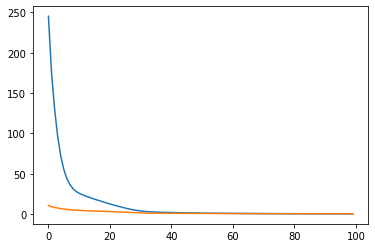

6/6 [==============================] - 0s 2ms/step - loss: 0.2836 - mae: 0.4132 - mse: 0.2836


In [ ]:
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.show()

loss, mae, mse = model.evaluate(X_test, y_test, verbose=1)

In [ ]:
X_test.head()

,Country.of.Origin,Variety,Processing.Method,Moisture,Category.One.Defects,Color,Category.Two.Defects,altitude_mean_meters
208,21,3,3,0.928571,0.0,0,0.00000,0.297643
521,14,5,2,0.785714,0.0,1,0.12500,0.232447
580,14,20,3,0.857143,0.0,1,0.06250,0.322718
62,6,12,3,0.785714,0.0,1,0.03125,0.378887
431,0,2,0,0.785714,0.0,1,0.00000,0.272568


In [ ]:
y_test.head()

208    7.67
521    7.67
580    7.08
62     7.83
431    7.42
Name: Cupper.Points, dtype: float64

In [ ]:
model.predict([[14,	20,	3,	0.8571,	0.000000,	1,	0.06250,	0.3227]])

array([[7.7562356]], dtype=float32)